<a href="https://colab.research.google.com/github/hadiidfajri/Big-Data/blob/main/Classification_Product_Review_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Read the data (using pandas)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nadyinky/sephora-products-and-skincare-reviews")

print("Path to dataset files:", path)

100%|██████████| 147M/147M [00:02<00:00, 54.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nadyinky/sephora-products-and-skincare-reviews/versions/2


In [ ]:
import os

# List files in the downloaded directory
file_list = os.listdir(path)
print("Files in the downloaded directory:", file_list)

# Assuming the CSV file has a similar name to the dataset or a common name
# You might need to adjust the filename based on the actual contents of the directory
csv_filename = "reviews_1250-end.csv"

if csv_filename:
    csv_filepath = os.path.join(path, csv_filename)
    df = pd.read_csv(csv_filepath)
    display(df.head()) # Display the head of the dataframe to confirm it's loaded
else:
    print("No CSV file found in the downloaded directory.")
    df = None # Set df to None if no CSV is found

Files in the downloaded directory: ['reviews_1250-end.csv', 'reviews_750-1250.csv', 'reviews_500-750.csv', 'reviews_0-250.csv', 'product_info.csv', 'reviews_250-500.csv']


/tmp/ipython-input-2537766933.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filepath)


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [ ]:
df.head(5)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [ ]:
df.shape

(49977, 19)

# Preprocessing Data


In [ ]:
df

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,49972,2276253200,5,1.0,NaN,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,NaN,fair,brown,combination,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49973,49973,28013163278,5,1.0,NaN,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,NaN,NaN,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49974,49974,1539813076,5,1.0,NaN,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,NaN,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49975,49975,5595682861,5,1.0,NaN,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,NaN,fair,hazel,oily,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0


## Data Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                49977 non-null  int64  
 1   author_id                 49977 non-null  object 
 2   rating                    49977 non-null  int64  
 3   is_recommended            46160 non-null  float64
 4   helpfulness               36522 non-null  float64
 5   total_feedback_count      49977 non-null  int64  
 6   total_neg_feedback_count  49977 non-null  int64  
 7   total_pos_feedback_count  49977 non-null  int64  
 8   submission_time           49977 non-null  object 
 9   review_text               49918 non-null  object 
 10  review_title              35599 non-null  object 
 11  skin_tone                 42776 non-null  object 
 12  eye_color                 43717 non-null  object 
 13  skin_type                 46346 non-null  object 
 14  hair_c

In [ ]:
df.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,49977.000000,49977.000000,46160.000000,36522.000000,49977.000000,49977.000000,49977.000000,49977.000000
mean,24988.000000,4.212678,0.813323,0.767657,8.311163,1.936931,6.374232,66.884717
std,14427.261538,1.262289,0.389656,0.296319,21.285085,8.705750,16.778032,72.211730
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,12494.000000,4.000000,1.000000,0.664115,0.000000,0.000000,0.000000,28.000000
50%,24988.000000,5.000000,1.000000,0.884615,3.000000,0.000000,2.000000,45.000000
75%,37482.000000,5.000000,1.000000,1.000000,9.000000,2.000000,6.000000,74.000000
max,49976.000000,5.000000,1.000000,1.000000,1222.000000,1159.000000,776.000000,1900.000000


In [ ]:
df.nunique()

,0
Unnamed: 0,49977
author_id,41457
rating,5
is_recommended,2
helpfulness,1209
total_feedback_count,255
total_neg_feedback_count,124
total_pos_feedback_count,212
submission_time,3490
review_text,49395


In [ ]:
df.shape

(49977, 19)

## Data Duplicated


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

## Missing value

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
author_id,0
rating,0
is_recommended,3817
helpfulness,13455
total_feedback_count,0
total_neg_feedback_count,0
total_pos_feedback_count,0
submission_time,0
review_text,59


## Data Imputation

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Mean
imputer_mean=SimpleImputer(strategy='mean')
# Median
imputer_median = SimpleImputer(strategy='median')
# Most frequent
imputer_mode = SimpleImputer(strategy='most_frequent')
# Constant (misal isi dengan 0)
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)

Fill the missing skin_tone values using the mode

In [ ]:
df["skin_tone"] = pd.Series(imputer_mode.fit_transform(df[["skin_tone"]]).flatten())

In [ ]:
df["skin_tone"].isnull().sum()

np.int64(0)

Fill the missing eye_color values using the mode

---



In [ ]:
df["eye_color"] = pd.Series(imputer_mode.fit_transform(df[["eye_color"]]).flatten())

In [ ]:
df["eye_color"].isnull().sum()

np.int64(0)

Fill the missing skin_type values using the mode


In [ ]:
df["skin_type"]=pd.Series(imputer_mode.fit_transform(df[["skin_type"]]).flatten())

In [ ]:
df["skin_type"].isnull().sum()

np.int64(0)

Fill the missing hair_color values using the mode


In [ ]:
df["hair_color"]=pd.Series(imputer_mode.fit_transform(df[["hair_color"]]).flatten())

In [ ]:
df["hair_color"].isnull().sum()

np.int64(0)

Fill the helpfulness values using the mean


In [ ]:
df["helpfulness"]=pd.Series(imputer_mean.fit_transform(df[["helpfulness"]]).flatten())

In [ ]:
df["helpfulness"].isnull().sum()

np.int64(0)

## Data Correlation

In [ ]:
#drop_colomns=df[["Unnamed: 0","author_id","rating_label"]]
#df.drop(drop=drop_colomns,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                49977 non-null  int64  
 1   author_id                 49977 non-null  object 
 2   rating                    49977 non-null  int64  
 3   is_recommended            46160 non-null  float64
 4   helpfulness               49977 non-null  float64
 5   total_feedback_count      49977 non-null  int64  
 6   total_neg_feedback_count  49977 non-null  int64  
 7   total_pos_feedback_count  49977 non-null  int64  
 8   submission_time           49977 non-null  object 
 9   review_text               49918 non-null  object 
 10  review_title              35599 non-null  object 
 11  skin_tone                 49977 non-null  object 
 12  eye_color                 49977 non-null  object 
 13  skin_type                 49977 non-null  object 
 14  hair_c

In [ ]:
# Select only numerical columns for correlation calculation
df_numerical = df.select_dtypes(include=np.number)
# Calculate and display the correlation matrix
correlation_matrix = df_numerical.corr()
display(correlation_matrix)

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
Unnamed: 0,1.000000,-0.039678,-0.055113,0.055918,0.066253,0.045813,0.060279,-0.023922
rating,-0.039678,1.000000,0.871608,0.161051,-0.146634,-0.172124,-0.096713,0.011992
is_recommended,-0.055113,0.871608,1.000000,0.133919,-0.150688,-0.153439,-0.108116,0.015848
helpfulness,0.055918,0.161051,0.133919,1.000000,-0.001093,-0.227433,0.116624,-0.056199
total_feedback_count,0.066253,-0.146634,-0.150688,-0.001093,1.000000,0.667402,0.922328,0.140188
total_neg_feedback_count,0.045813,-0.172124,-0.153439,-0.227433,0.667402,1.000000,0.327807,0.076717
total_pos_feedback_count,0.060279,-0.096713,-0.108116,0.116624,0.922328,0.327807,1.000000,0.138039
price_usd,-0.023922,0.011992,0.015848,-0.056199,0.140188,0.076717,0.138039,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                49977 non-null  int64  
 1   author_id                 49977 non-null  object 
 2   rating                    49977 non-null  int64  
 3   is_recommended            46160 non-null  float64
 4   helpfulness               49977 non-null  float64
 5   total_feedback_count      49977 non-null  int64  
 6   total_neg_feedback_count  49977 non-null  int64  
 7   total_pos_feedback_count  49977 non-null  int64  
 8   submission_time           49977 non-null  object 
 9   review_text               49918 non-null  object 
 10  review_title              35599 non-null  object 
 11  skin_tone                 49977 non-null  object 
 12  eye_color                 49977 non-null  object 
 13  skin_type                 49977 non-null  object 
 14  hair_c

# Data Visualization (skew,balanced data,and so on)



## Pisahkan Data Numerical dan Categorical

In [ ]:
numerical_col = df.select_dtypes(exclude='object')
categorical_col = df.select_dtypes(exclude='number')

In [ ]:
print(numerical_col)

       Unnamed: 0  rating  is_recommended  helpfulness  total_feedback_count  \
0               0       5             1.0     0.000000                     2   
1               1       3             1.0     0.333333                     3   
2               2       5             1.0     1.000000                     2   
3               3       5             1.0     1.000000                     2   
4               4       5             1.0     1.000000                    13   
...           ...     ...             ...          ...                   ...   
49972       49972       5             1.0     0.767657                     0   
49973       49973       5             1.0     0.767657                     0   
49974       49974       5             1.0     0.767657                     0   
49975       49975       5             1.0     0.767657                     0   
49976       49976       5             1.0     0.767657                     0   

       total_neg_feedback_count  total_

In [ ]:
print(categorical_col)

         author_id submission_time  \
0       1945004256      2022-12-10   
1       5478482359      2021-12-17   
2      29002209922      2021-06-07   
3       7391078463      2021-05-21   
4       1766313888      2021-03-29   
...            ...             ...   
49972   2276253200      2023-03-13   
49973  28013163278      2023-03-13   
49974   1539813076      2023-03-13   
49975   5595682861      2023-03-13   
49976  27666075558      2023-03-13   

                                             review_text  \
0      I absolutely L-O-V-E this oil. I have acne pro...   
1      I gave this 3 stars because it give me tiny li...   
2      Works well as soon as I wash my face and pat d...   
3      this oil helped with hydration and breakouts, ...   
4      This is my first product review ever so that s...   
...                                                  ...   
49972  Consider salicylic acid your secret weapon for...   
49973  I’ve been using this as my only moisturizer fo...   
499

## Imbalanced Data

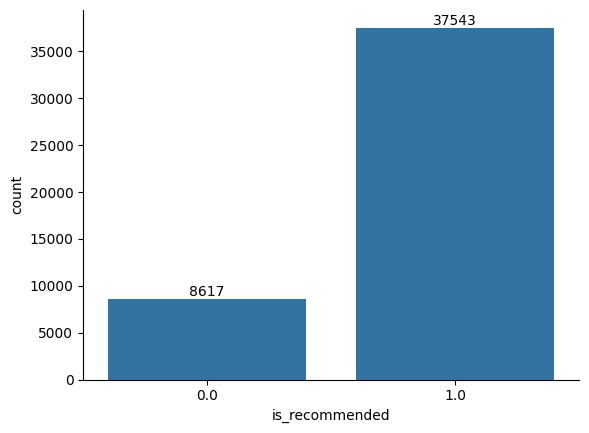

In [ ]:
ax = sns.countplot(x='is_recommended', data=df)
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

## Outlier Data


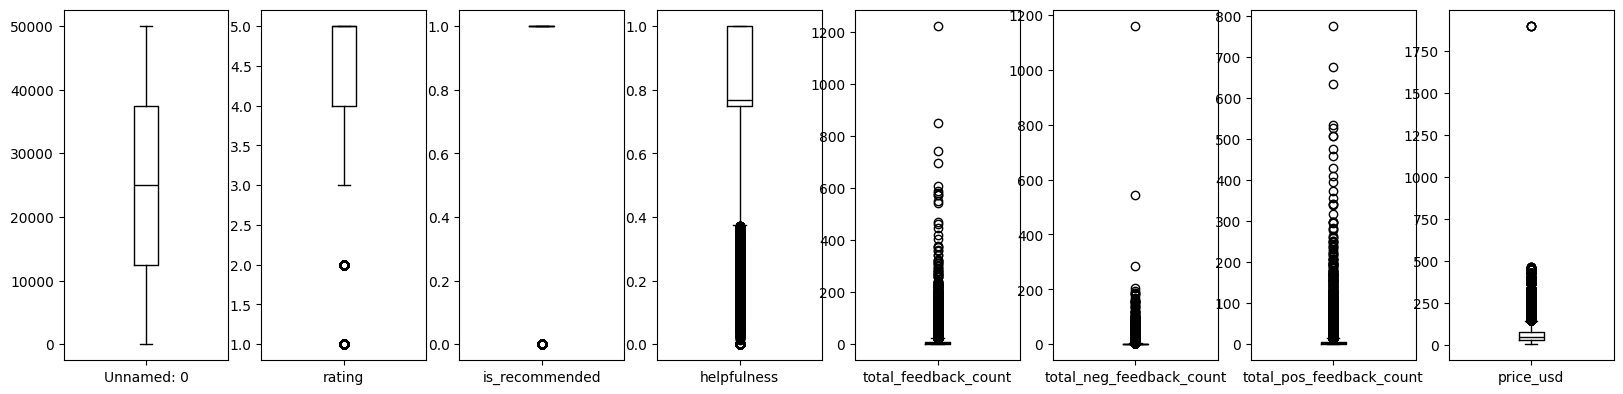

In [ ]:
numerical_col.plot(kind = 'box', subplots = True, layout = (2,8), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

## Numerical Distribution

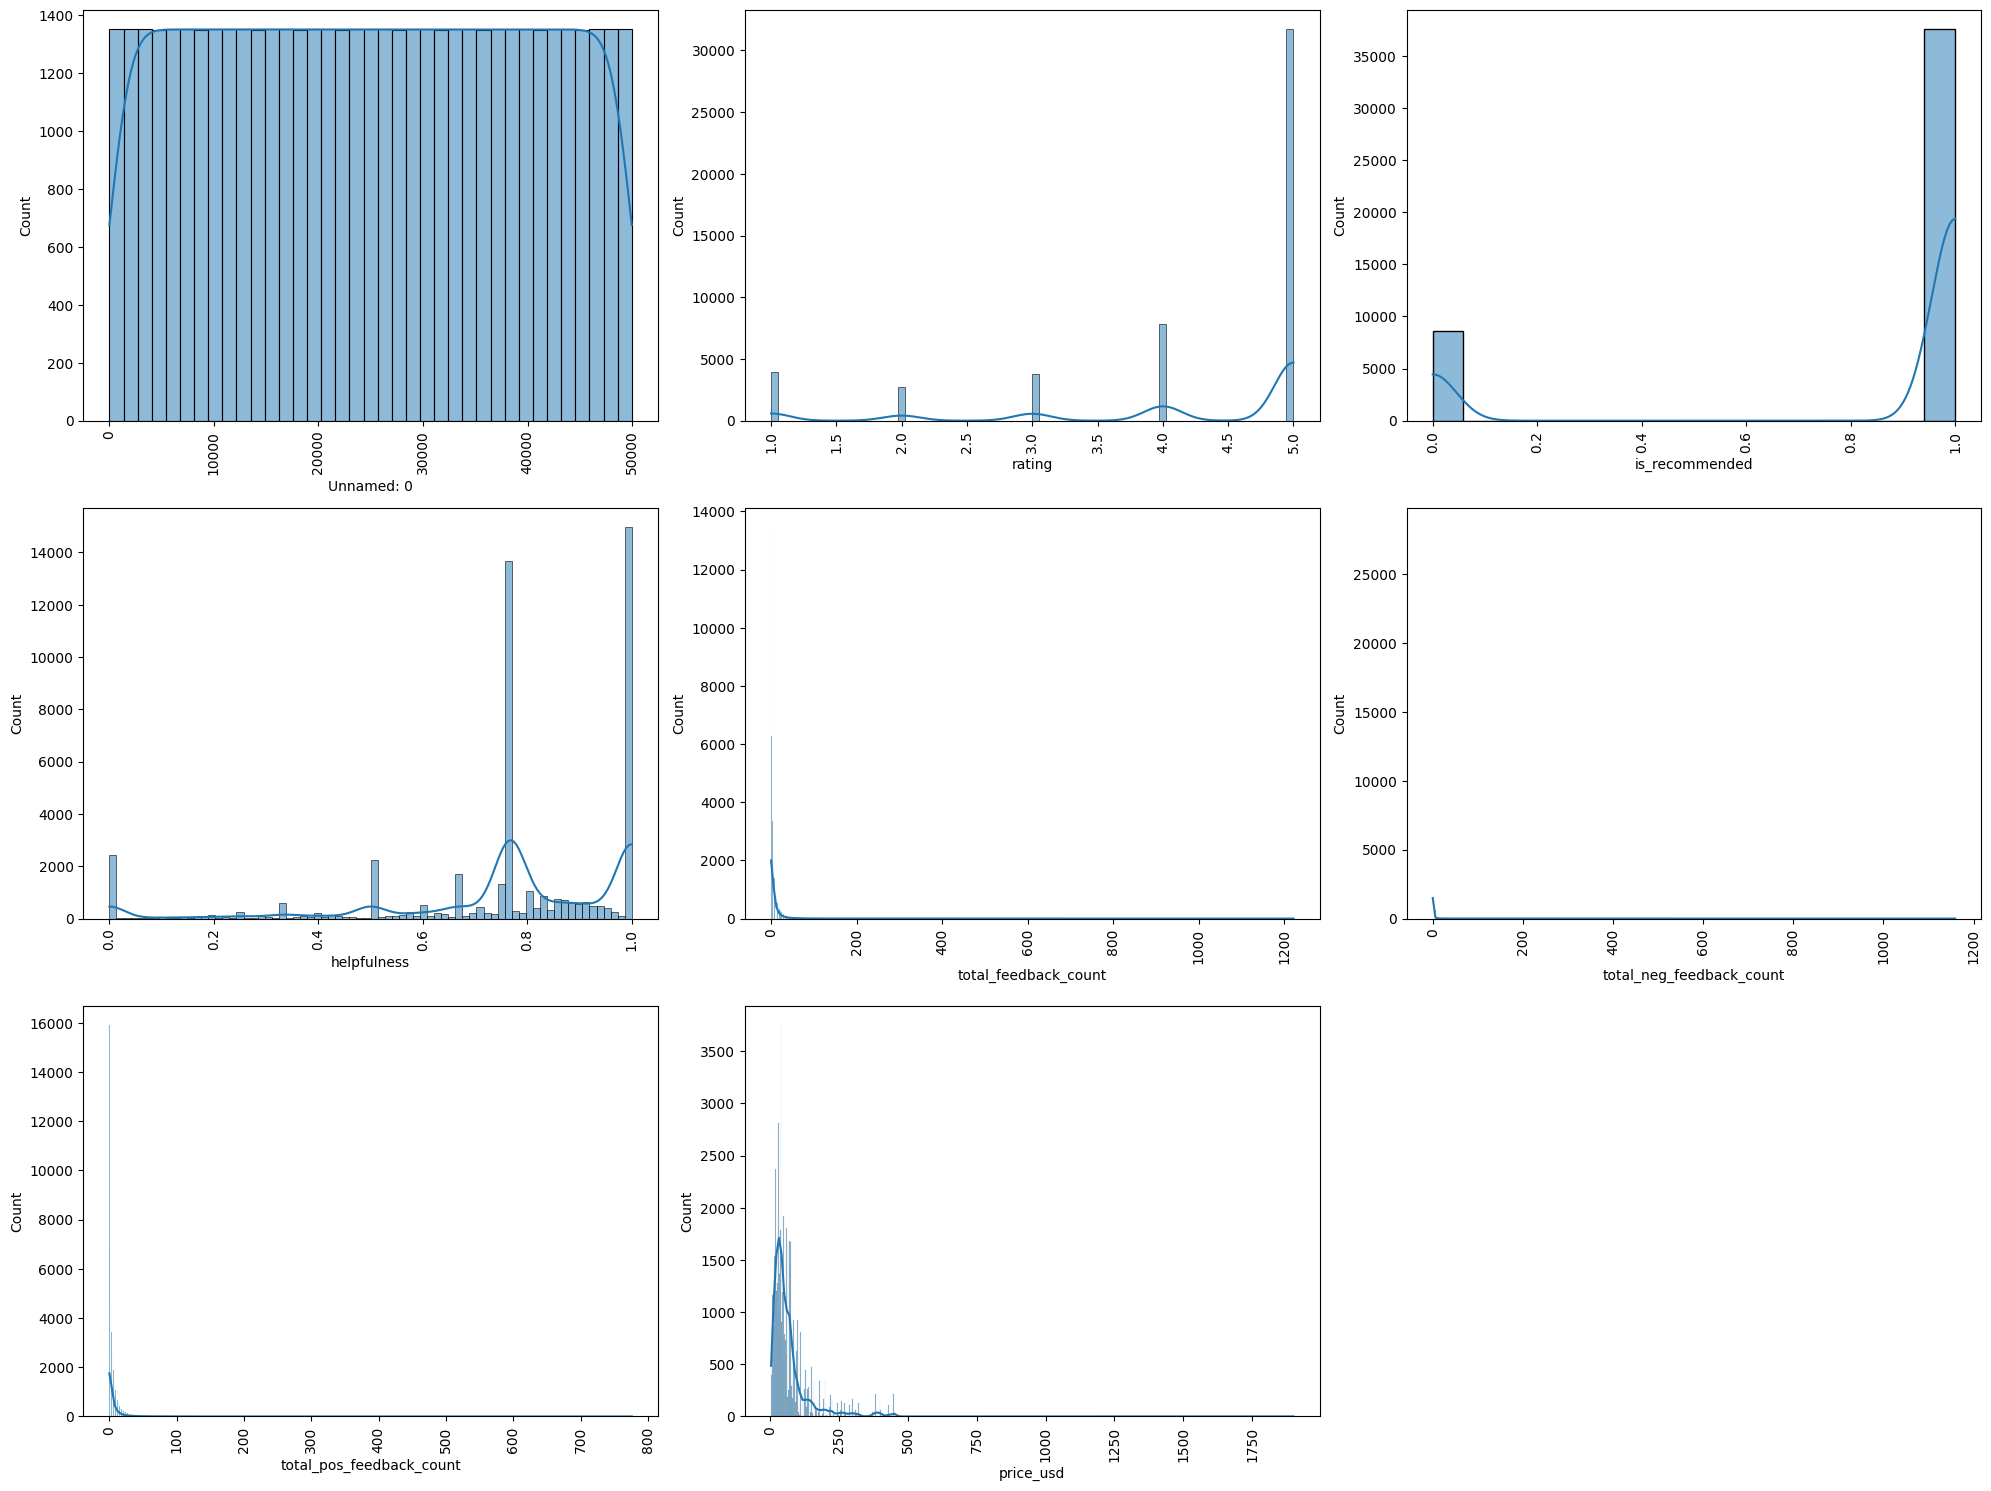

In [ ]:
plt.figure(figsize=(20, 15))
num_cols = len(numerical_col.columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed
for index, column in enumerate(numerical_col.columns):
    plt.subplot(rows, 3, index + 1)
    sns.histplot(data=numerical_col, x=column, kde=True)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
plt.show()

# Categorical Distribution

In [ ]:
df.nunique()

,0
Unnamed: 0,49977
author_id,41457
rating,5
is_recommended,2
helpfulness,1210
total_feedback_count,255
total_neg_feedback_count,124
total_pos_feedback_count,212
submission_time,3490
review_text,49395


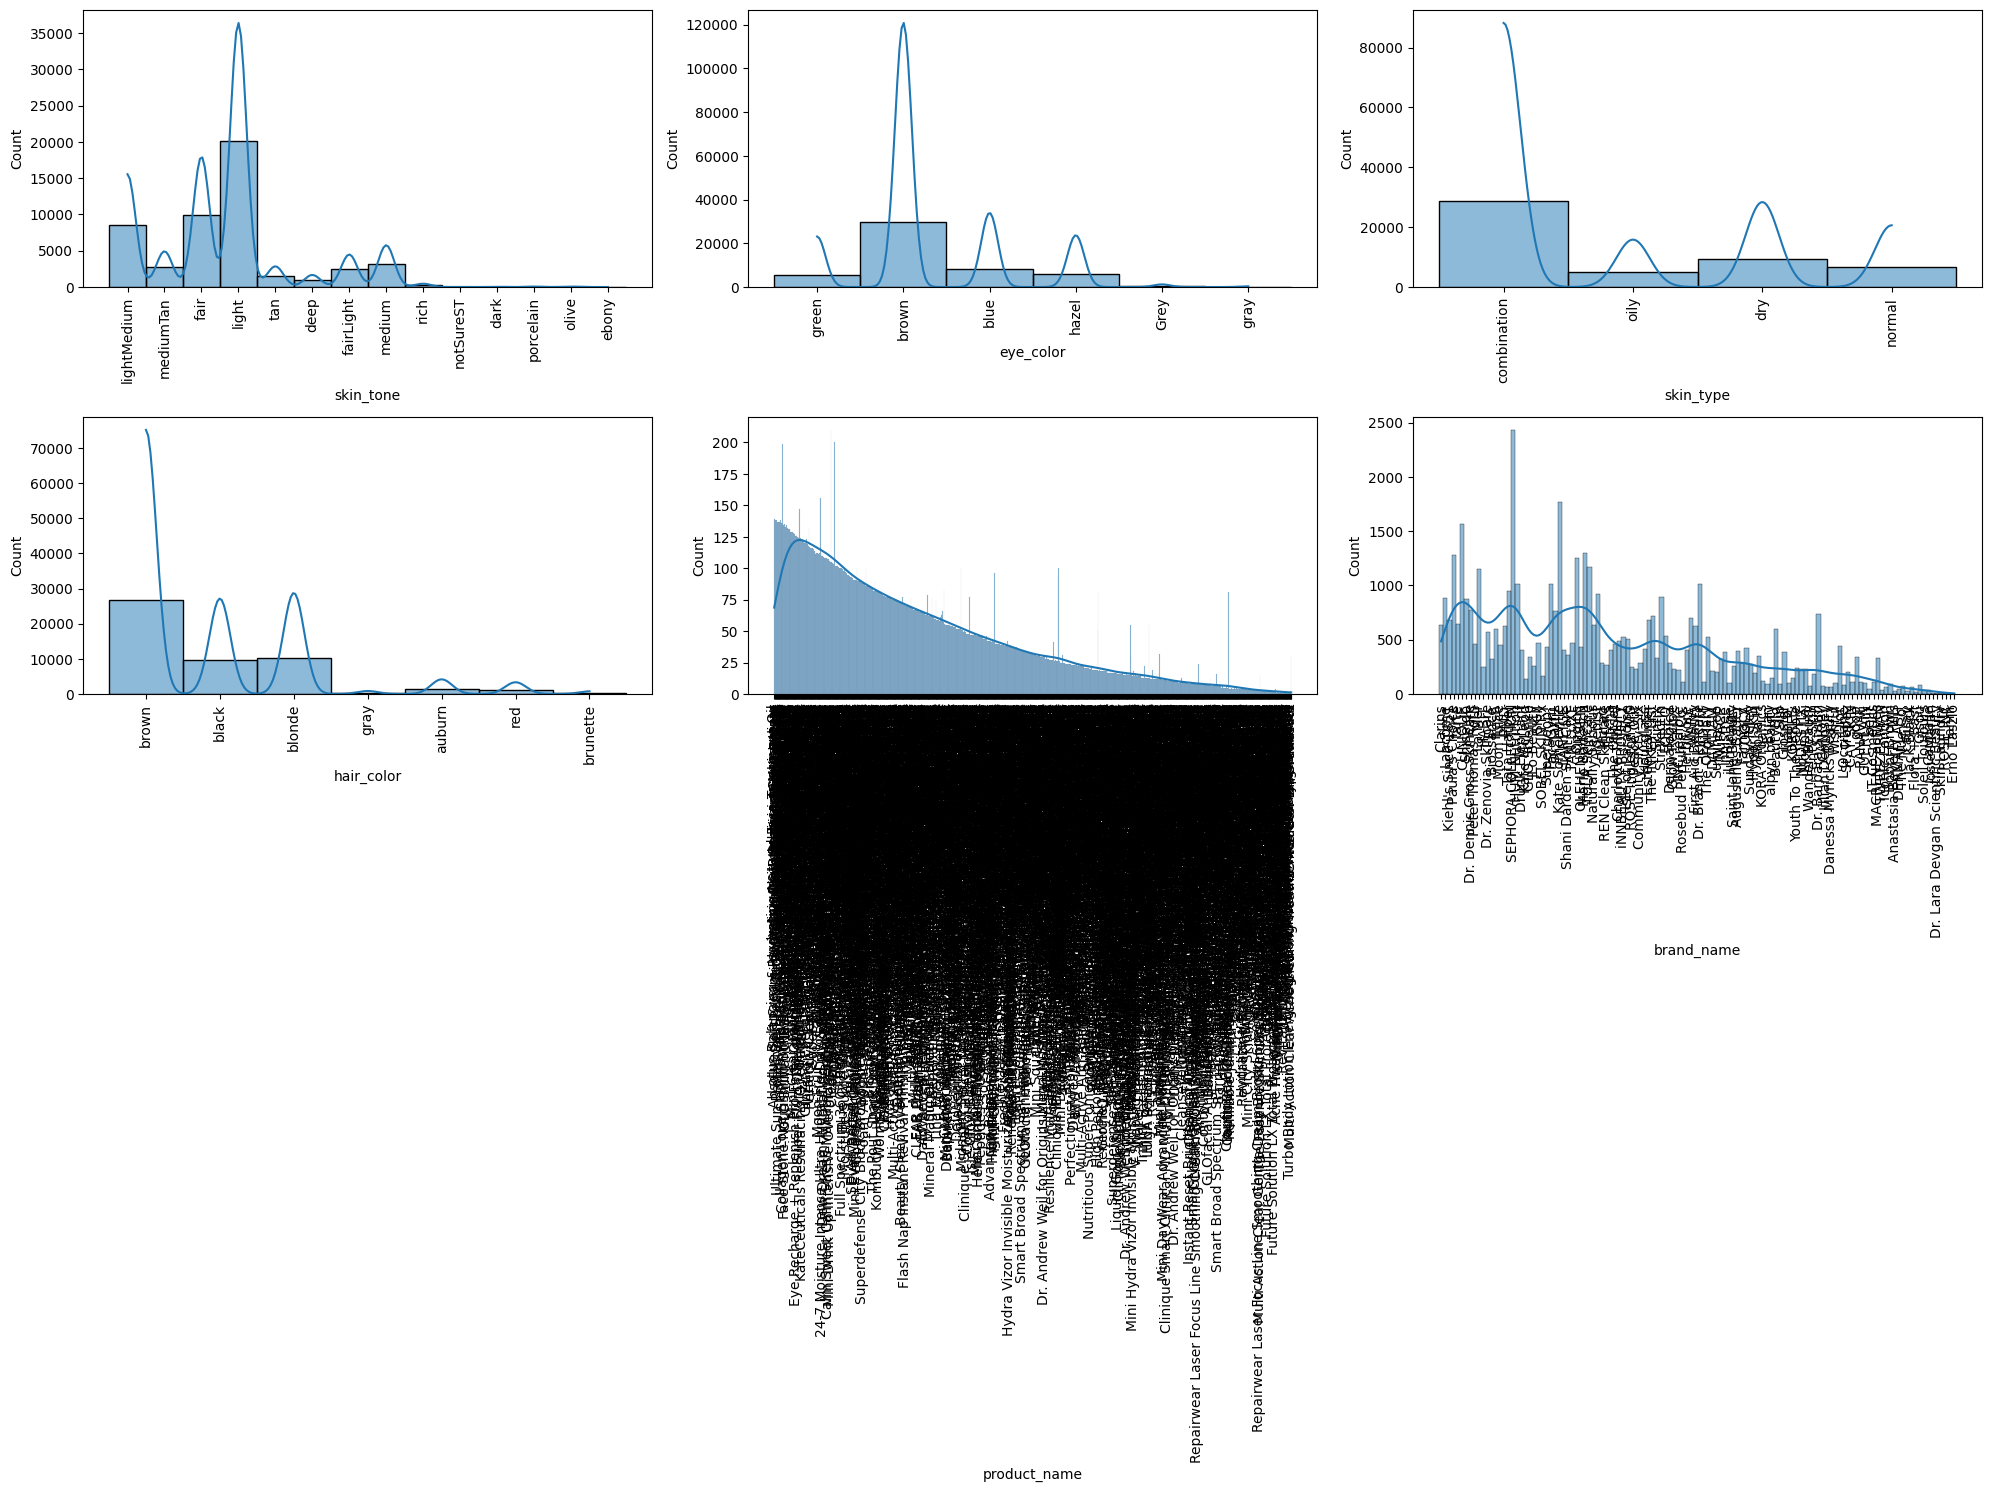

In [ ]:
plt.figure(figsize=(20, 15))
# Exclude columns that are not suitable for histogram plots
categorical_cols_to_plot = categorical_col.drop(columns=['author_id', 'submission_time', 'review_text', 'review_title','product_id'])
num_cols = len(categorical_cols_to_plot.columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed
for index, column in enumerate(categorical_cols_to_plot.columns):
    plt.subplot(rows, 3, index + 1)
    sns.histplot(data=categorical_cols_to_plot, x=column, kde=True)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
plt.show()

# Oversampling the data

## Getting more the data from reviews_500-750.csv and merge with the main data (df)

In [ ]:
import os

# List files in the downloaded directory
file_list = os.listdir(path)
print("Files in the downloaded directory:", file_list)

# Assuming the CSV file has a similar name to the dataset or a common name
# You might need to adjust the filename based on the actual contents of the directory
csv_filename = "reviews_500-750.csv"

if csv_filename:
    csv_filepath = os.path.join(path, csv_filename)
    data_2 = pd.read_csv(csv_filepath)
    display(data_2.head()) # Display the head of the dataframe to confirm it's loaded
else:
    print("No CSV file found in the downloaded directory.")
    df = None # Set df to None if no CSV is found

Files in the downloaded directory: ['reviews_1250-end.csv', 'reviews_750-1250.csv', 'reviews_500-750.csv', 'reviews_0-250.csv', 'product_info.csv', 'reviews_250-500.csv']


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2079014373,5,1.0,NaN,0,0,0,2023-03-14,These are the only pimple patches I’ve used th...,Best Pimple Patches,medium,blue,normal,NaN,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
1,1,12631885517,4,1.0,NaN,0,0,0,2023-02-08,One of my ingrown hair turned inflamed and sor...,It works!,mediumTan,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
2,2,2321761961,5,1.0,1.0,1,0,1,2023-02-05,I have tried 10 different acne/blemish patches...,Good for a large or painful breakout! Sleep in...,NaN,hazel,combination,blonde,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
3,3,1380382883,4,1.0,NaN,0,0,0,2023-01-24,"Love these for my mid-size breakouts, specifyi...",Micro tips are a plus!!,light,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
4,4,8871759068,4,1.0,1.0,1,0,1,2023-01-15,Best so far - though still not particularly ef...,NaN,NaN,NaN,NaN,NaN,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0


In [ ]:
data_2


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2079014373,5,1.0,NaN,0,0,0,2023-03-14,These are the only pimple patches I’ve used th...,Best Pimple Patches,medium,blue,normal,NaN,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
1,1,12631885517,4,1.0,NaN,0,0,0,2023-02-08,One of my ingrown hair turned inflamed and sor...,It works!,mediumTan,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
2,2,2321761961,5,1.0,1.0,1,0,1,2023-02-05,I have tried 10 different acne/blemish patches...,Good for a large or painful breakout! Sleep in...,NaN,hazel,combination,blonde,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
3,3,1380382883,4,1.0,NaN,0,0,0,2023-01-24,"Love these for my mid-size breakouts, specifyi...",Micro tips are a plus!!,light,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
4,4,8871759068,4,1.0,1.0,1,0,1,2023-01-15,Best so far - though still not particularly ef...,NaN,NaN,NaN,NaN,NaN,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116257,116257,7549964033,3,0.0,1.0,2,0,2,2022-11-24,"Cute packaging, innovative component. The prod...",Can live without it,NaN,brown,oily,NaN,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0
116258,116258,22017857232,5,1.0,1.0,1,0,1,2022-11-24,"I am obsessed with this intensive lip mask, do...",Loveeee!,fair,brown,dry,black,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0
116259,116259,30329641422,5,1.0,NaN,0,0,0,2022-11-24,After using this product from a free sample pr...,Best Lip Mask Ever!,lightMedium,blue,normal,blonde,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0
116260,116260,34099439981,5,1.0,NaN,0,0,0,2022-11-24,Plum and plush my lips are. These don’t necess...,Plush pudding makes me lips look so smooth,NaN,brown,combination,black,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0


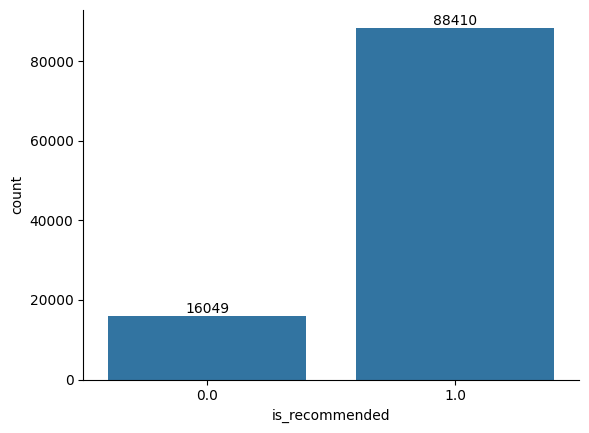

In [ ]:
ax = sns.countplot(x='is_recommended', data=data_2)
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

## Getting more data from "reviews_250-500.csv" and merge with the main data (df)

In [ ]:
import os

# List files in the downloaded directory
file_list = os.listdir(path)
print("Files in the downloaded directory:", file_list)

# Assuming the CSV file has a similar name to the dataset or a common name
# You might need to adjust the filename based on the actual contents of the directory
csv_filename = "reviews_250-500.csv"

if csv_filename:
    csv_filepath = os.path.join(path, csv_filename)
    data_3 = pd.read_csv(csv_filepath)
    display(data_3.head()) # Display the head of the dataframe to confirm it's loaded
else:
    print("No CSV file found in the downloaded directory.")
    df = None # Set df to None if no CSV is found

Files in the downloaded directory: ['reviews_1250-end.csv', 'reviews_750-1250.csv', 'reviews_500-750.csv', 'reviews_0-250.csv', 'product_info.csv', 'reviews_250-500.csv']


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2190293206,2,0.0,NaN,0,0,0,2023-03-19,Used to swear by this product but hate the sme...,NaN,lightMedium,brown,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
1,1,9113341005,5,1.0,NaN,0,0,0,2023-03-18,I’ve only been using this for a week and my sk...,More tolerable than The Ordinary,deep,brown,normal,black,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
2,2,23866342710,1,0.0,1.000000,13,0,13,2023-03-12,"Why, why, why would you change the formula?!!!...",New formula is awful very sad,fairLight,blue,combination,blonde,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
3,3,1328806527,1,0.0,0.941176,17,1,16,2023-03-12,I have used this product for years and it has ...,Recently reformulated and the new formula is A...,light,brown,combination,gray,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
4,4,31262847082,5,1.0,1.000000,1,0,1,2023-03-09,Great product for anti-aging Also great for da...,Must have product in my nighttime skincare rou...,lightMedium,hazel,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99


In [ ]:
data_3

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2190293206,2,0.0,NaN,0,0,0,2023-03-19,Used to swear by this product but hate the sme...,NaN,lightMedium,brown,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
1,1,9113341005,5,1.0,NaN,0,0,0,2023-03-18,I’ve only been using this for a week and my sk...,More tolerable than The Ordinary,deep,brown,normal,black,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
2,2,23866342710,1,0.0,1.000000,13,0,13,2023-03-12,"Why, why, why would you change the formula?!!!...",New formula is awful very sad,fairLight,blue,combination,blonde,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
3,3,1328806527,1,0.0,0.941176,17,1,16,2023-03-12,I have used this product for years and it has ...,Recently reformulated and the new formula is A...,light,brown,combination,gray,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
4,4,31262847082,5,1.0,1.000000,1,0,1,2023-03-09,Great product for anti-aging Also great for da...,Must have product in my nighttime skincare rou...,lightMedium,hazel,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206720,206720,5113824372,4,1.0,0.851852,27,4,23,2019-05-02,I haven’t used this long enough to report any ...,NaN,mediumTan,brown,normal,black,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99
206721,206721,5297430713,5,1.0,0.750000,32,8,24,2019-04-27,"this serum is GREAT! Absorbs nicely, sits well...",NaN,medium,brown,dry,black,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99
206722,206722,2090479401,5,1.0,0.736842,38,10,28,2019-04-22,I have been using this serum on my neck (day a...,Nice Collagen Serum!,fairLight,blue,dry,blonde,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99
206723,206723,10575410512,4,1.0,0.795455,44,9,35,2019-04-19,I enjoyed this product more as a “primer” for ...,Great as a primer!,light,blue,combination,brown,P443846,Collagen Booster Firming Peptide Serum,The INKEY List,12.99


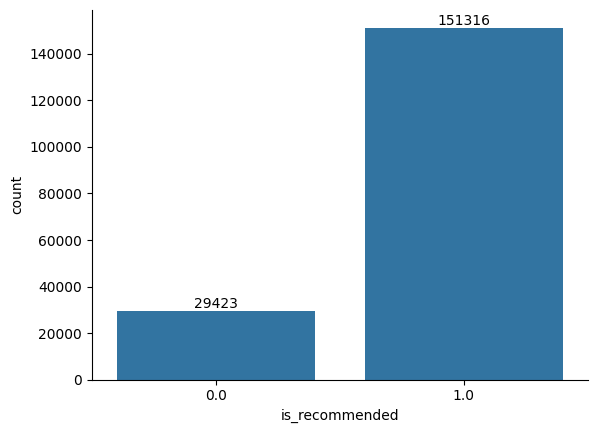

In [ ]:
ax=sns.countplot(x="is_recommended",data=data_3)
for label in ax.containers:
  ax.bar_label(label)
sns.despine()
plt.show()

## How to concated the data

*   Clean the data
*   filter null label
*   and merged with the df based on author_id



In [ ]:
filtered_data3=data_3[data_3['is_recommended'] == 0.0].head(28926)

In [ ]:
len(filtered_data3)

28926

In [ ]:
df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,brown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [ ]:
filtered_data3.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2190293206,2,0.0,NaN,0,0,0,2023-03-19,Used to swear by this product but hate the sme...,NaN,lightMedium,brown,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
2,2,23866342710,1,0.0,1.000000,13,0,13,2023-03-12,"Why, why, why would you change the formula?!!!...",New formula is awful very sad,fairLight,blue,combination,blonde,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
3,3,1328806527,1,0.0,0.941176,17,1,16,2023-03-12,I have used this product for years and it has ...,Recently reformulated and the new formula is A...,light,brown,combination,gray,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
8,8,6768361454,1,0.0,0.909091,11,1,10,2023-03-03,Been using this product for well over a year a...,NaN,light,hazel,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
9,9,6860968769,1,0.0,0.800000,15,3,12,2023-03-01,"I used to swear by this product, but after the...",Threw up in my mouth - new formulation SUCKS,lightMedium,blue,dry,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99


In [ ]:
df_concat = pd.concat([df,filtered_data3], ignore_index=True)

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78903 entries, 0 to 78902
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                78903 non-null  int64  
 1   author_id                 78903 non-null  object 
 2   rating                    78903 non-null  int64  
 3   is_recommended            75086 non-null  float64
 4   helpfulness               70632 non-null  float64
 5   total_feedback_count      78903 non-null  int64  
 6   total_neg_feedback_count  78903 non-null  int64  
 7   total_pos_feedback_count  78903 non-null  int64  
 8   submission_time           78903 non-null  object 
 9   review_text               78808 non-null  object 
 10  review_title              55729 non-null  object 
 11  skin_tone                 77638 non-null  object 
 12  eye_color                 77260 non-null  object 
 13  skin_type                 78194 non-null  object 
 14  hair_c

In [ ]:
df_concat.shape

(78903, 19)

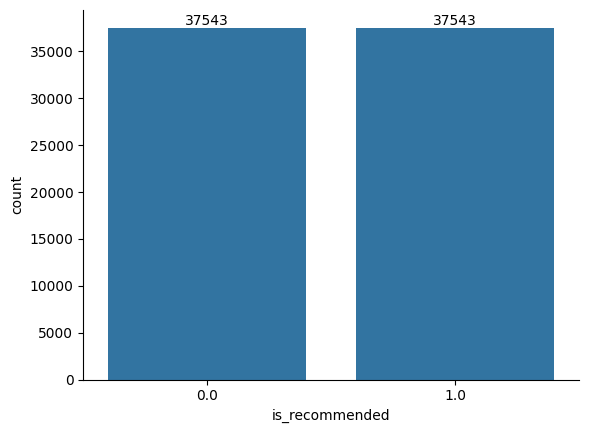

In [ ]:
ax = sns.countplot(x='is_recommended', data=df_concat)
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

# Concat file preprocessing

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78903 entries, 0 to 78902
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                78903 non-null  int64  
 1   author_id                 78903 non-null  object 
 2   rating                    78903 non-null  int64  
 3   is_recommended            75086 non-null  float64
 4   helpfulness               70632 non-null  float64
 5   total_feedback_count      78903 non-null  int64  
 6   total_neg_feedback_count  78903 non-null  int64  
 7   total_pos_feedback_count  78903 non-null  int64  
 8   submission_time           78903 non-null  object 
 9   review_text               78808 non-null  object 
 10  review_title              55729 non-null  object 
 11  skin_tone                 77638 non-null  object 
 12  eye_color                 77260 non-null  object 
 13  skin_type                 78194 non-null  object 
 14  hair_c

## Drop coloumns

In [ ]:
df_concat.drop(columns=["Unnamed: 0","author_id","review_text","review_title","submission_time"],inplace=True)

In [ ]:
df_concat

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,5,1.0,0.000000,2,2,0,lightMedium,green,combination,brown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,3,1.0,0.333333,3,2,1,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,5,1.0,1.000000,2,0,2,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,5,1.0,1.000000,2,0,2,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,5,1.0,1.000000,13,0,13,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78898,3,0.0,0.000000,1,1,0,lightMedium,brown,dry,brown,P457864,Vital Skin-Strengthening Hyaluronic Acid Super...,Kiehl's Since 1851,60.0
78899,2,0.0,NaN,0,0,0,lightMedium,blue,combination,brown,P457864,Vital Skin-Strengthening Hyaluronic Acid Super...,Kiehl's Since 1851,60.0
78900,3,0.0,NaN,0,0,0,lightMedium,brown,combination,brown,P457864,Vital Skin-Strengthening Hyaluronic Acid Super...,Kiehl's Since 1851,60.0
78901,1,0.0,0.833333,6,1,5,light,green,dry,blonde,P457864,Vital Skin-Strengthening Hyaluronic Acid Super...,Kiehl's Since 1851,60.0


## Missing Value

In [ ]:
df_concat.isnull().sum()

,0
rating,0
is_recommended,3817
helpfulness,8271
total_feedback_count,0
total_neg_feedback_count,0
total_pos_feedback_count,0
skin_tone,1265
eye_color,1643
skin_type,709
hair_color,1996


In [ ]:
df_concat.dropna(subset=["is_recommended"],inplace=True)

In [ ]:
df_concat["is_recommended"].isnull().sum()


np.int64(0)

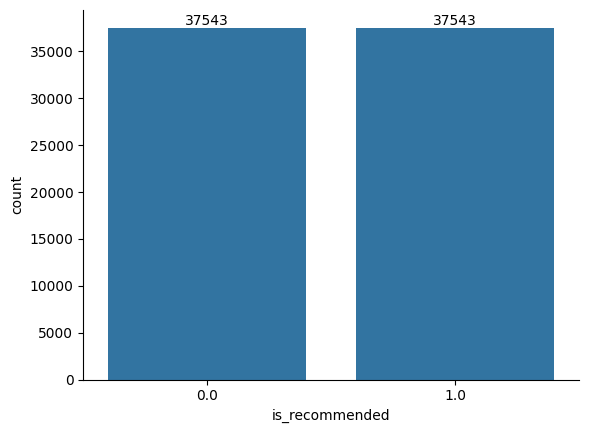

In [ ]:
ax = sns.countplot(x="is_recommended",data=df_concat)
for label in ax.containers :
  ax.bar_label(label)
sns.despine()
plt.show()

#Duplicated data

In [ ]:
df_concat.duplicated().sum()

np.int64(3830)

In [ ]:
df_concat[df_concat.duplicated()]

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
160,5,1.0,0.767657,0,0,0,light,brown,combination,brown,P474843,Absolue Soft Cream Revitalizing & Brightening ...,Lancôme,150.0
168,5,1.0,0.767657,0,0,0,light,brown,combination,brown,P474843,Absolue Soft Cream Revitalizing & Brightening ...,Lancôme,150.0
185,5,1.0,0.767657,0,0,0,light,brown,combination,brown,P474843,Absolue Soft Cream Revitalizing & Brightening ...,Lancôme,150.0
186,5,1.0,0.767657,0,0,0,light,hazel,combination,brown,P474843,Absolue Soft Cream Revitalizing & Brightening ...,Lancôme,150.0
194,4,1.0,0.767657,0,0,0,fair,hazel,combination,brown,P474843,Absolue Soft Cream Revitalizing & Brightening ...,Lancôme,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78325,3,0.0,NaN,0,0,0,fair,blue,combination,blonde,P306941,DermalQuench Hyaluronic Acid Hydration Treatment,Kate Somerville,110.0
78562,3,0.0,NaN,0,0,0,lightMedium,brown,combination,brown,P479971,Rénergie H.C.F. Triple Serum: For Plumping & A...,Lancôme,140.0
78871,3,0.0,1.000000,1,0,1,lightMedium,brown,combination,brown,P457864,Vital Skin-Strengthening Hyaluronic Acid Super...,Kiehl's Since 1851,60.0
78882,4,0.0,NaN,0,0,0,fair,blue,combination,blonde,P457864,Vital Skin-Strengthening Hyaluronic Acid Super...,Kiehl's Since 1851,60.0


In [ ]:
df_concat.drop_duplicates(inplace=True,keep="first")

In [ ]:
df_concat[df_concat.duplicated()]

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd


In [ ]:
df_concat.drop_duplicates(inplace=True,keep="first")

In [ ]:
df_concat.duplicated().sum()

np.int64(0)

Double check the imbalance data

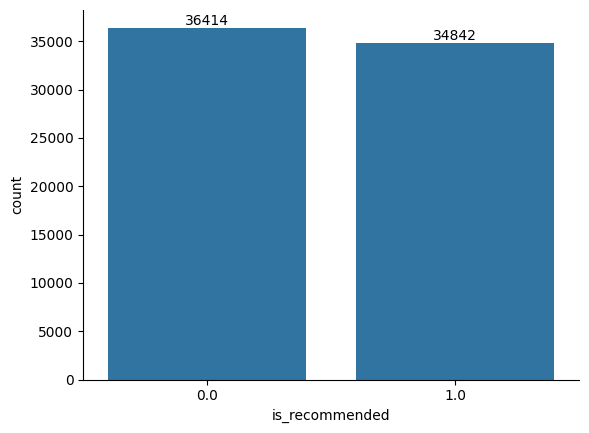

In [ ]:
ax=sns.countplot(data=df_concat,x="is_recommended")
for label in ax.containers:
  ax.bar_label(label)
sns.despine()
plt.show()

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71256 entries, 0 to 78902
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rating                    71256 non-null  int64  
 1   is_recommended            71256 non-null  float64
 2   helpfulness               63943 non-null  float64
 3   total_feedback_count      71256 non-null  int64  
 4   total_neg_feedback_count  71256 non-null  int64  
 5   total_pos_feedback_count  71256 non-null  int64  
 6   skin_tone                 70111 non-null  object 
 7   eye_color                 69703 non-null  object 
 8   skin_type                 70634 non-null  object 
 9   hair_color                69383 non-null  object 
 10  product_id                71256 non-null  object 
 11  product_name              71256 non-null  object 
 12  brand_name                71256 non-null  object 
 13  price_usd                 71256 non-null  float64
dtypes: float64(

In [ ]:
df_concat.isnull().sum()

,0
rating,0
is_recommended,0
helpfulness,7313
total_feedback_count,0
total_neg_feedback_count,0
total_pos_feedback_count,0
skin_tone,1145
eye_color,1553
skin_type,622
hair_color,1873


In [ ]:
df_concat["hair_color"].unique()


array(['brown', 'black', 'blonde', 'gray', 'auburn', 'red', 'brunette',
       nan], dtype=object)

In [ ]:
df_concat["hair_color"].value_counts()


,count
hair_color,
brown,33149
blonde,15772
black,14765
auburn,2429
red,2017
brunette,776
gray,475


In [ ]:
df_concat["hair_color"].replace(["nan"], np.nan, inplace=True)


/tmp/ipython-input-259669178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_concat["hair_color"].replace(["nan"], np.nan, inplace=True)


# Data Imputation (hair_color,skin_type,eye_color,skin_tone,helpfulness)

Mode value imputation data for hair_color,skin_tone,skin_type,and eye_color columns

In [ ]:
columns_to_impute_mode = ["skin_type","hair_color","eye_color","skin_tone"]

for column in columns_to_impute_mode :
  mode_value=df_concat[column].mode()[0]
  df_concat[column]=df_concat[column].fillna(mode_value)
  print(f"Missing values in {column} : {df_concat[column].isnull().sum()}")



Missing values in skin_type : 0
Missing values in hair_color : 0
Missing values in eye_color : 0
Missing values in skin_tone : 0


Mean value imputation for helpfulness columns

In [ ]:
df["helpfulness"].dtype

dtype('float64')

In [ ]:
mean_value_helpfulness=df_concat["helpfulness"].mean()
df_concat["helpfulness"]=df_concat["helpfulness"].fillna(mean_value_helpfulness)

In [ ]:
df_concat["helpfulness"].isnull().sum()

np.int64(0)

Double check the data

In [ ]:
df_concat.head()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,5,1.0,0.000000,2,2,0,lightMedium,green,combination,brown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,3,1.0,0.333333,3,2,1,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,5,1.0,1.000000,2,0,2,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,5,1.0,1.000000,2,0,2,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,5,1.0,1.000000,13,0,13,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71256 entries, 0 to 78902
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rating                    71256 non-null  int64  
 1   is_recommended            71256 non-null  float64
 2   helpfulness               71256 non-null  float64
 3   total_feedback_count      71256 non-null  int64  
 4   total_neg_feedback_count  71256 non-null  int64  
 5   total_pos_feedback_count  71256 non-null  int64  
 6   skin_tone                 71256 non-null  object 
 7   eye_color                 71256 non-null  object 
 8   skin_type                 71256 non-null  object 
 9   hair_color                71256 non-null  object 
 10  product_id                71256 non-null  object 
 11  product_name              71256 non-null  object 
 12  brand_name                71256 non-null  object 
 13  price_usd                 71256 non-null  float64
dtypes: float64(

#Data info (correlation,outlier,encoding,distribution,uniqueness,data type separation)

## Data type separation

In [ ]:
numerical_col=df_concat.select_dtypes(exclude='object')
categorical_col=df_concat.select_dtypes(exclude='number')

### Information of each type

Categorical

In [ ]:
for i in categorical_col:
  print(f"Data dari column {i} : {df_concat[i].unique()}")

Data dari column skin_tone : ['lightMedium' 'mediumTan' 'fair' 'light' 'tan' 'deep' 'fairLight'
 'medium' 'rich' 'notSureST' 'dark' 'porcelain' 'olive' 'ebony']
Data dari column eye_color : ['green' 'brown' 'blue' 'hazel' 'Grey' 'gray']
Data dari column skin_type : ['combination' 'oily' 'dry' 'normal']
Data dari column hair_color : ['brown' 'black' 'blonde' 'gray' 'auburn' 'red' 'brunette']
Data dari column product_id : ['P379064' 'P474843' 'P422003' ... 'P474840' 'P474832' 'P457864']
Data dari column product_name : ['Lotus Balancing & Hydrating Natural Face Treatment Oil'
 'Absolue Soft Cream Revitalizing & Brightening Moisturizer'
 'Daily Reviving Concentrate' ...
 'Micro-Dose Anti-Aging Retinol Serum with Ceramides and Peptide'
 'Sugar Recovery Lip Mask Advanced Therapy'
 'Vital Skin-Strengthening Hyaluronic Acid Super Serum']
Data dari column brand_name : ['Clarins' 'Lancôme' "Kiehl's Since 1851" "Paula's Choice" 'tarte'
 'CLINIQUE' 'Shiseido' 'Dr. Dennis Gross Skincare' 'Peter Tho

Numerical

In [ ]:
for i in numerical_col :
  print(f"Data dari column {i} : { df_concat[i].unique()}")

Data dari column rating : [5 3 2 4 1]
Data dari column is_recommended : [1. 0.]
Data dari column helpfulness : [0.         0.33333299 1.         ... 0.98360699 0.99386501 0.80116999]
Data dari column total_feedback_count : [   2    3   13    5   10   15    4   12    9    6    0    1    7    8
   14   28   11   41   20   18   87   17   16   36   31   30   73   82
   58   19   22   25   34   27   49   57   21   32   23   42   38   45
   52   53  101   24   35   29   37   48   50   59   80   33  119   98
  313  206   40   51   97   74  134   70   78   88  208  108  123   68
   77  378   81   93  144  470   46  176   90  150   94  267  170  114
   47   43   44   26   39   55  122   75   92  128   60   89  132   79
   69  154   66   72   71  582  240  148  112   61   95   62  104   91
  162   54   63   67   65  196  110  550  744  149  100   84  126   56
  125  117  102  198  107  189  115   76   99   85  237  178  173  282
  181  165  202  166   83  121  259  318  344  175  171  207  199  

## Data Distribution

### Outlier Data

Numerical Column


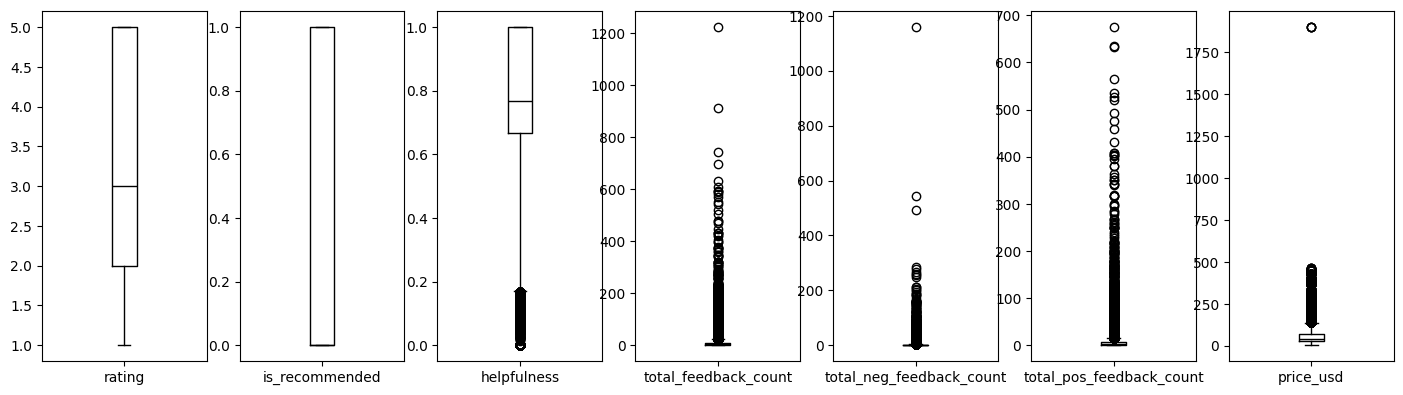

In [ ]:
numerical_col.plot(kind = 'box', subplots = True, layout = (2,8), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

In [ ]:
# Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['rating',"is_recommended",'helpfulness']
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
            print(outliers)
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

# Menampilkan jumlah data yang oulier
outliers(data_out=df_concat[continous_features])

For the feature rating, Num of Outliers is 0
[]
For the feature is_recommended, Num of Outliers is 0
[]
For the feature helpfulness, Num of Outliers is 4194
[0, 30, 35, 190, 221, 279, 316, 347, 363, 376, 416, 426, 453, 467, 542, 569, 600, 619, 622, 623, 665, 672, 835, 874, 899, 907, 911, 932, 979, 987, 993, 1011, 1014, 1017, 1023, 1104, 1154, 1253, 1283, 1301, 1407, 1504, 1526, 1528, 1532, 1533, 1543, 1612, 1646, 1663, 1674, 1694, 1714, 1728, 1743, 1747, 1758, 1790, 1805, 1808, 1816, 1836, 1845, 1858, 1873, 1875, 1883, 1898, 1899, 1902, 1911, 1914, 1916, 1918, 1919, 1920, 1928, 1931, 1962, 1964, 2026, 2036, 2045, 2052, 2059, 2069, 2070, 2081, 2090, 2092, 2200, 2217, 2219, 2220, 2223, 2226, 2228, 2229, 2231, 2232, 2234, 2235, 2236, 2237, 2241, 2242, 2243, 2245, 2247, 2248, 2250, 2251, 2253, 2254, 2255, 2257, 2259, 2263, 2264, 2266, 2311, 2346, 2351, 2371, 2379, 2391, 2480, 2510, 2570, 2572, 2574, 2578, 2581, 2583, 2591, 2597, 2598, 2610, 2617, 2654, 2658, 2688, 2714, 2808, 2809, 2818, 2

In [ ]:
df_concat['helpfulness'].value_counts()

,count
helpfulness,
1.000000,19846
0.767657,10701
0.745416,7313
0.500000,3580
0.000000,3424
...,...
0.951872,1
0.290323,1
0.685185,1


# Data Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
numerical_col_3 = df_concat.select_dtypes(exclude='object')
categorical_col_3 = df_concat.select_dtypes(exclude='number')

In [ ]:
le = LabelEncoder()

for i in categorical_col_3 :
  categorical_col_3[i]=le.fit_transform(categorical_col_3[i])

In [ ]:
for col in categorical_col_3:
  print(f"Data dari column {col} : {categorical_col_3[col].unique()}")

Data dari column skin_tone : [ 6  8  3  5 13  1  4  7 12  9  0 11 10  2]
Data dari column eye_color : [4 2 1 5 0 3]
Data dari column skin_type : [0 3 1 2]
Data dari column hair_color : [3 1 2 5 0 6 4]
Data dari column product_id : [ 43 860 195 ... 859 856 602]
Data dari column product_name : [ 666   40  322 ...  689 1099 1268]
Data dari column brand_name : [ 14  66  62  80 127  10  93  23  82  65  43  26   6 121  71  79 107  88
  44  27  60  38  54  89  90 103  33  24  61  64  92 104  78  77  70 105
  75   0  73  84 108 112  13 123  53  86  81  15  47  30 109  95  99  32
  19  42  50  87  46  68  36  22  28 111  16 100  76 125 124  91   3  34
  11 102  48   1  58  31 118   4  96  41 126  59 117  74  72 115  35  21
   8  56  18 116  20  63  98   9 122  83  39 119  51  67 106  52   7   2
  17 110 120  55  37  40  97  12  57  25  94  85  45  29  69 113 101   5
 114  49]


In [ ]:
numerical_col_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71256 entries, 0 to 78902
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rating                    71256 non-null  int64  
 1   is_recommended            71256 non-null  float64
 2   helpfulness               71256 non-null  float64
 3   total_feedback_count      71256 non-null  int64  
 4   total_neg_feedback_count  71256 non-null  int64  
 5   total_pos_feedback_count  71256 non-null  int64  
 6   price_usd                 71256 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 4.3 MB


In [ ]:
categorical_col_3

,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name
0,6,4,0,3,43,666,14
1,8,2,3,1,43,666,14
2,6,2,1,1,43,666,14
3,6,2,0,2,43,666,14
4,8,2,0,1,43,666,14
...,...,...,...,...,...,...,...
78898,6,2,1,3,602,1268,62
78899,6,1,0,3,602,1268,62
78900,6,2,0,3,602,1268,62
78901,5,4,1,2,602,1268,62


# Data Correlation

Numerical Columns

In [ ]:
numerical_col_3.corr()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
rating,1.000000,0.867389,0.169771,-0.128090,-0.156444,-0.078891,0.100192
is_recommended,0.867389,1.000000,0.152817,-0.076125,-0.111811,-0.036053,0.094281
helpfulness,0.169771,0.152817,1.000000,-0.034743,-0.265232,0.106743,-0.012780
total_feedback_count,-0.128090,-0.076125,-0.034743,1.000000,0.704829,0.912984,0.078882
total_neg_feedback_count,-0.156444,-0.111811,-0.265232,0.704829,1.000000,0.354076,0.021937
total_pos_feedback_count,-0.078891,-0.036053,0.106743,0.912984,0.354076,1.000000,0.091377
price_usd,0.100192,0.094281,-0.012780,0.078882,0.021937,0.091377,1.000000


In [ ]:
numerical_col_3.corr().style.background_gradient(cmap='coolwarm')

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
rating,1.000000,0.867389,0.169771,-0.128090,-0.156444,-0.078891,0.100192
is_recommended,0.867389,1.000000,0.152817,-0.076125,-0.111811,-0.036053,0.094281
helpfulness,0.169771,0.152817,1.000000,-0.034743,-0.265232,0.106743,-0.012780
total_feedback_count,-0.128090,-0.076125,-0.034743,1.000000,0.704829,0.912984,0.078882
total_neg_feedback_count,-0.156444,-0.111811,-0.265232,0.704829,1.000000,0.354076,0.021937
total_pos_feedback_count,-0.078891,-0.036053,0.106743,0.912984,0.354076,1.000000,0.091377
price_usd,0.100192,0.094281,-0.012780,0.078882,0.021937,0.091377,1.000000


In [ ]:
cor_matrix=numerical_col_3.corr()
cor_matrix["is_recommended"].sort_values(ascending=False)

,is_recommended
is_recommended,1.000000
rating,0.867389
helpfulness,0.152817
price_usd,0.094281
total_pos_feedback_count,-0.036053
total_feedback_count,-0.076125
total_neg_feedback_count,-0.111811


In [ ]:
numerical_col_3

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
0,5,1.0,0.000000,2,2,0,65.0
1,3,1.0,0.333333,3,2,1,65.0
2,5,1.0,1.000000,2,0,2,65.0
3,5,1.0,1.000000,2,0,2,65.0
4,5,1.0,1.000000,13,0,13,65.0
...,...,...,...,...,...,...,...
78898,3,0.0,0.000000,1,1,0,60.0
78899,2,0.0,0.745416,0,0,0,60.0
78900,3,0.0,0.745416,0,0,0,60.0
78901,1,0.0,0.833333,6,1,5,60.0


# Modelling Preparation

In [ ]:
numerical_col_3.shape

(71256, 7)

In [ ]:
categorical_col_3.shape

(71256, 7)

In [ ]:
df_modelling=pd.concat([numerical_col_3.reset_index(drop=True),categorical_col_3.reset_index(drop=True)],axis=1)

In [ ]:
df_modelling

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name
0,5,1.0,0.000000,2,2,0,65.0,6,4,0,3,43,666,14
1,3,1.0,0.333333,3,2,1,65.0,8,2,3,1,43,666,14
2,5,1.0,1.000000,2,0,2,65.0,6,2,1,1,43,666,14
3,5,1.0,1.000000,2,0,2,65.0,6,2,0,2,43,666,14
4,5,1.0,1.000000,13,0,13,65.0,8,2,0,1,43,666,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71251,3,0.0,0.000000,1,1,0,60.0,6,2,1,3,602,1268,62
71252,2,0.0,0.745416,0,0,0,60.0,6,1,0,3,602,1268,62
71253,3,0.0,0.745416,0,0,0,60.0,6,2,0,3,602,1268,62
71254,1,0.0,0.833333,6,1,5,60.0,5,4,1,2,602,1268,62


In [ ]:
df_modelling["product_id"].value_counts()

,count
product_id,
225,423
632,395
187,350
308,327
263,322
...,...
940,1
939,1
908,1


In [ ]:
df_modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71256 entries, 0 to 71255
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rating                    71256 non-null  int64  
 1   is_recommended            71256 non-null  float64
 2   helpfulness               71256 non-null  float64
 3   total_feedback_count      71256 non-null  int64  
 4   total_neg_feedback_count  71256 non-null  int64  
 5   total_pos_feedback_count  71256 non-null  int64  
 6   price_usd                 71256 non-null  float64
 7   skin_tone                 71256 non-null  int64  
 8   eye_color                 71256 non-null  int64  
 9   skin_type                 71256 non-null  int64  
 10  hair_color                71256 non-null  int64  
 11  product_id                71256 non-null  int64  
 12  product_name              71256 non-null  int64  
 13  brand_name                71256 non-null  int64  
dtypes: flo

In [ ]:
df_modelling.isnull().sum()

,0
rating,0
is_recommended,0
helpfulness,0
total_feedback_count,0
total_neg_feedback_count,0
total_pos_feedback_count,0
price_usd,0
skin_tone,0
eye_color,0
skin_type,0


In [ ]:
df_modelling.drop('product_id',axis=1)

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,skin_tone,eye_color,skin_type,hair_color,product_name,brand_name
0,5,1.0,0.000000,2,2,0,65.0,6,4,0,3,666,14
1,3,1.0,0.333333,3,2,1,65.0,8,2,3,1,666,14
2,5,1.0,1.000000,2,0,2,65.0,6,2,1,1,666,14
3,5,1.0,1.000000,2,0,2,65.0,6,2,0,2,666,14
4,5,1.0,1.000000,13,0,13,65.0,8,2,0,1,666,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71251,3,0.0,0.000000,1,1,0,60.0,6,2,1,3,1268,62
71252,2,0.0,0.745416,0,0,0,60.0,6,1,0,3,1268,62
71253,3,0.0,0.745416,0,0,0,60.0,6,2,0,3,1268,62
71254,1,0.0,0.833333,6,1,5,60.0,5,4,1,2,1268,62


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df_modelling.drop('is_recommended', axis=1)
y = df_modelling['is_recommended']



In [ ]:
X

,rating,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name
0,5,0.000000,2,2,0,65.0,6,4,0,3,43,666,14
1,3,0.333333,3,2,1,65.0,8,2,3,1,43,666,14
2,5,1.000000,2,0,2,65.0,6,2,1,1,43,666,14
3,5,1.000000,2,0,2,65.0,6,2,0,2,43,666,14
4,5,1.000000,13,0,13,65.0,8,2,0,1,43,666,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71251,3,0.000000,1,1,0,60.0,6,2,1,3,602,1268,62
71252,2,0.745416,0,0,0,60.0,6,1,0,3,602,1268,62
71253,3,0.745416,0,0,0,60.0,6,2,0,3,602,1268,62
71254,1,0.833333,6,1,5,60.0,5,4,1,2,602,1268,62


In [ ]:
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X, y)



RFE(estimator=RandomForestClassifier(), n_features_to_select=8)

In [ ]:
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

Selected Features: ['rating', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'price_usd', 'product_id', 'product_name', 'brand_name']


# Scalling the data

Chose the most important thing feature based one random forest classifier selection

In [ ]:
variable_dataframe=['rating', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'price_usd', 'product_id', 'product_name', 'brand_name','is_recommended']

In [ ]:
variable_dataframe

['rating',
 'helpfulness',
 'total_feedback_count',
 'total_neg_feedback_count',
 'price_usd',
 'product_id',
 'product_name',
 'brand_name',
 'is_recommended']

In [ ]:
df_modelling=df_modelling[variable_dataframe]

In [ ]:
df_modelling

,rating,helpfulness,total_feedback_count,total_neg_feedback_count,price_usd,product_id,product_name,brand_name,is_recommended
0,5,0.000000,2,2,65.0,43,666,14,1.0
1,3,0.333333,3,2,65.0,43,666,14,1.0
2,5,1.000000,2,0,65.0,43,666,14,1.0
3,5,1.000000,2,0,65.0,43,666,14,1.0
4,5,1.000000,13,0,65.0,43,666,14,1.0
...,...,...,...,...,...,...,...,...,...
71251,3,0.000000,1,1,60.0,602,1268,62,0.0
71252,2,0.745416,0,0,60.0,602,1268,62,0.0
71253,3,0.745416,0,0,60.0,602,1268,62,0.0
71254,1,0.833333,6,1,60.0,602,1268,62,0.0


In [ ]:
X = df_modelling.drop('is_recommended', axis=1)
y = df_modelling['is_recommended']

Robust Scaller

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaller=RobustScaler()
X_robustscaller=scaller.fit_transform(X)

In [ ]:
x_scalled=pd.DataFrame(X_robustscaller,columns=X.columns)

In [ ]:
print(x_scalled.head())

     rating  helpfulness  total_feedback_count  total_neg_feedback_count  \
0  0.666667    -2.302974             -0.111111                       1.0   
1  0.000000    -1.302974              0.000000                       1.0   
2  0.666667     0.697029             -0.111111                       0.0   
3  0.666667     0.697029             -0.111111                       0.0   
4  0.666667     0.697029              1.111111                       0.0   

   price_usd  product_id  product_name  brand_name  
0   0.522727   -0.889845           0.0        -0.8  
1   0.522727   -0.889845           0.0        -0.8  
2   0.522727   -0.889845           0.0        -0.8  
3   0.522727   -0.889845           0.0        -0.8  
4   0.522727   -0.889845           0.0        -0.8  


# Modelling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scalled, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

In [ ]:
# Menyiapkan libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## Classification


**Decision Tree Classifier**

In [ ]:
# Buat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model
dt_model.fit(X_train, y_train)

# Prediksi data uji
y_pred_dt = dt_model.predict(X_test)

# Evaluasi hasil
print("=== Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

=== Decision Tree ===
Akurasi: 0.9569168157737782
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     14550
         1.0       0.96      0.96      0.96     13953

    accuracy                           0.96     28503
   macro avg       0.96      0.96      0.96     28503
weighted avg       0.96      0.96      0.96     28503



**XGBoost Clasifier**

In [ ]:
# Buat model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Latih model
xgb_model.fit(X_train, y_train)

# Prediksi data uji
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi hasil
print("\n=== XGBoost ===")
print("Akurasi:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:37:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
Akurasi: 0.9715117706908045
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     14550
         1.0       0.97      0.97      0.97     13953

    accuracy                           0.97     28503
   macro avg       0.97      0.97      0.97     28503
weighted avg       0.97      0.97      0.97     28503

